In [1]:

# import pandas as pd

# # Load the dataset
# file_path = 'your_dataset.csv'
# data = pd.read_csv(file_path, delimiter='\t')

# # Replace missing values with a specific marker, such as 'NN'
# data_filled = data.fillna('NN')

# # Select SNP columns for encoding
# snp_columns = data.columns[1:-2]  # assuming the last two columns are gender and superpopulation

# # One-Hot Encode the SNP columns
# X_encoded = pd.get_dummies(data_filled[snp_columns], drop_first=True)

# # Add the non-SNP columns back to the encoded DataFrame
# clean_data_encoded = pd.concat([data[['id', 'gender', 'superpopulation']], X_encoded], axis=1)

# # Display the first few rows to verify the changes
# print(clean_data_encoded.head())

# # Estimate the size of the encoded DataFrame
# print(f'Estimated number of columns after one-hot encoding: {clean_data_encoded.shape[1]}')
# print(f'Estimated dataset size: {clean_data_encoded.memory_usage(deep=True).sum() / 1024:.2f} KB')


In [10]:
# Import, one-hot-encode, PCA with 2 components, then 2d display
# Now with sparse matrix

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

# Load the dataset
file_path = './Resources/kidd_combined.csv'
data = pd.read_csv(file_path, delimiter=',')


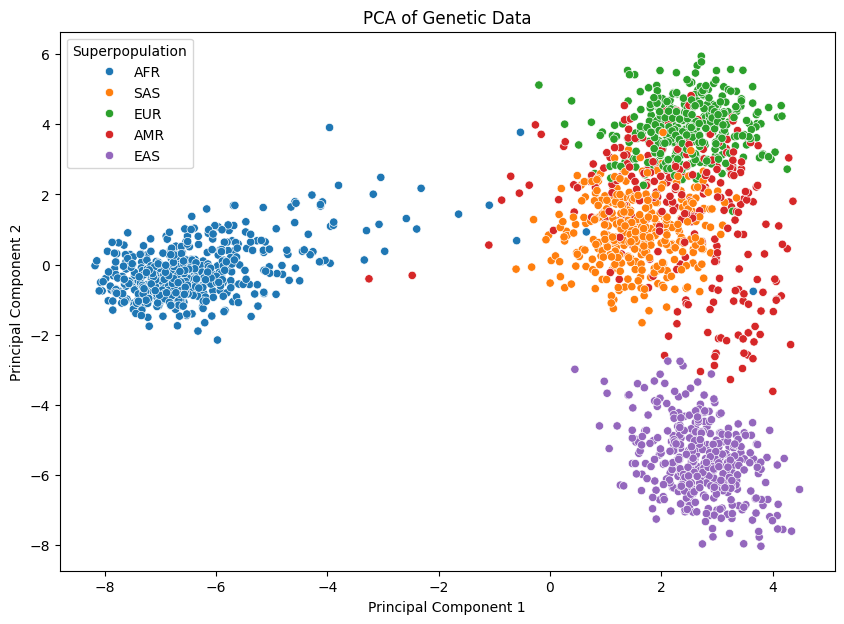

In [13]:

# Replace missing values with 'NN'
data_filled = data.fillna('NN')

# Select SNP columns for encoding
# Add logic to snip appropriate columns?
snp_columns = data.columns[1:-2]  # assuming the last two columns are gender and superpopulation

# One-Hot Encode the SNP columns
X_encoded = pd.get_dummies(data_filled[snp_columns], drop_first=True)

# Convert to sparse matrix = this can be deleted if unneccessary 
sparse_matrix = csr_matrix(X_encoded.values)

# # Add the non-SNP columns back to the encoded DataFrame
# clean_data_encoded = pd.concat([data[['id', 'gender', 'superpopulation']], X_encoded], axis=1)

# # Drop non-numeric columns for PCA
# X_pca = clean_data_encoded.drop(columns=['id', 'gender', 'superpopulation'])

# Standardize the data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(sparse_matrix)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['superpopulation'] = data['superpopulation']

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='superpopulation', palette='tab10')
plt.title('PCA of Genetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Superpopulation')
plt.show()


In [15]:
# Approximate memory usage of the sparse matrix
import sys

# Memory usage of the sparse matrix
matrix_memory = sys.getsizeof(sparse_matrix.data) + sys.getsizeof(sparse_matrix.indices) + sys.getsizeof(sparse_matrix.indptr)
print(f"Approximate memory usage: {matrix_memory / 1e6} MB")

Approximate memory usage: 0.010356 MB


In [19]:
# Check memory usage of each column
memory_usage = X_encoded.memory_usage(deep=True)
print(memory_usage)

# Total memory usage of the DataFrame
total_memory_usage = memory_usage.sum()
print(f"Total memory usage: {total_memory_usage / 1e6} MB")

Index            128
rs3737576_CT    2504
rs3737576_NN    2504
rs3737576_TC    2504
rs3737576_TT    2504
                ... 
rs310644_TT     2504
rs2024566_AG    2504
rs2024566_GA    2504
rs2024566_GG    2504
rs2024566_NN    2504
Length: 221, dtype: int64
Total memory usage: 0.551008 MB


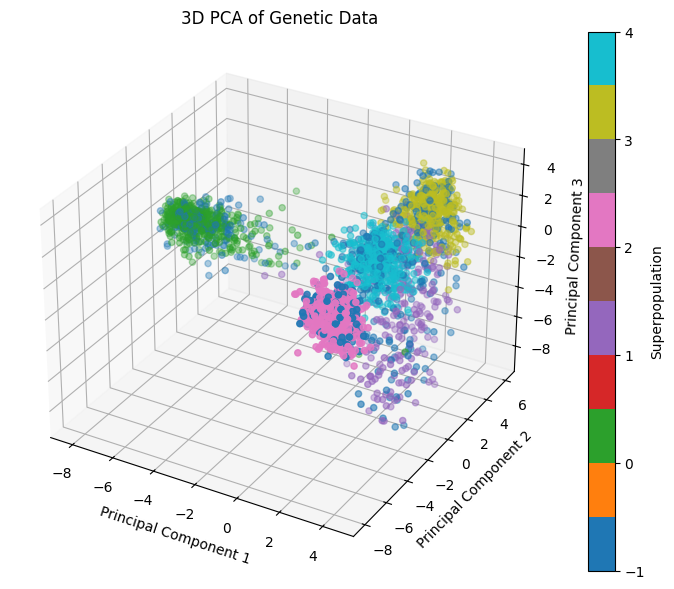

In [21]:
# Create a new PCA with 3 components, then 3d plot

# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 3 PCA components
num_components = 3
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])
pca_df['superpopulation'] = data['superpopulation']

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['superpopulation'].astype('category').cat.codes, cmap='tab10')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Genetic Data')
plt.colorbar(sc, label='Superpopulation')
plt.show()

In [ ]:

# Chunker for later

import pandas as pd
def one_hot_encode_chunk(chunk, categorical_columns):
    return pd.get_dummies(chunk, columns=categorical_columns)
# Define the path to the large dataset
file_path = 'example.csv'
# Specify the columns to be one-hot encoded
categorical_columns = ['category1', 'category2', 'category3']
# Define the chunk size
chunk_size = 10000
# Initialize an empty list to store processed chunks
processed_chunks = []
# Read and process the data in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # One-hot encode the categorical columns in the chunk
    encoded_chunk = one_hot_encode_chunk(chunk, categorical_columns)
# Concatenate all processed chunks into a single DataFrame
processed_data = pd.concat(processed_chunks, axis=0)
# Save the processed data to a new CSV file
processed_data.to_csv('processed_large_dataset.csv', index=False)

: 